In [1]:
import warnings
from collections import OrderedDict
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
warnings.filterwarnings('ignore')
df2=pd.read_csv("dataset.csv",encoding="big5")
df3=df2[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit ']]
exam_X=df3[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]
exam_y=df3[['Chance of Admit ']].round()

for i in exam_y:
    exam_y.loc[ exam_y[i]>=0.6,i]=1
    exam_y.loc[ exam_y[i]<0.6,i]=0
#print(exam_y)

examDict=df3
examOrderedDict=OrderedDict(examDict)
examDf=pd.DataFrame(examOrderedDict)
examDf.head()
examDf.describe()
from sklearn.model_selection  import train_test_split
train_X,test_X,train_y,test_y =train_test_split(exam_X,exam_y,train_size=0.8)
print('訓練集大小',train_X.shape,train_y.shape)
print('測試集大小',test_X.shape,test_y.shape)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_X,train_y)
print('模型得分為',round(model.score(test_X,test_y),4))
rDf=examDf.corr()
print(rDf)


訓練集大小 (320, 7) (320, 1)
測試集大小 (80, 7) (80, 1)
模型得分為 0.2185
                   GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  Research  Chance of Admit 
GRE Score           1.000000     0.835977           0.668976  0.612831  0.557555  0.833060  0.580391          0.802610
TOEFL Score         0.835977     1.000000           0.695590  0.657981  0.567721  0.828417  0.489858          0.791594
University Rating   0.668976     0.695590           1.000000  0.734523  0.660123  0.746479  0.447783          0.711250
SOP                 0.612831     0.657981           0.734523  1.000000  0.729593  0.718144  0.444029          0.675732
LOR                 0.557555     0.567721           0.660123  0.729593  1.000000  0.670211  0.396859          0.669889
CGPA                0.833060     0.828417           0.746479  0.718144  0.670211  1.000000  0.521654          0.873289
Research            0.580391     0.489858           0.447783  0.444029  0.396859  0.521654  1.000000        

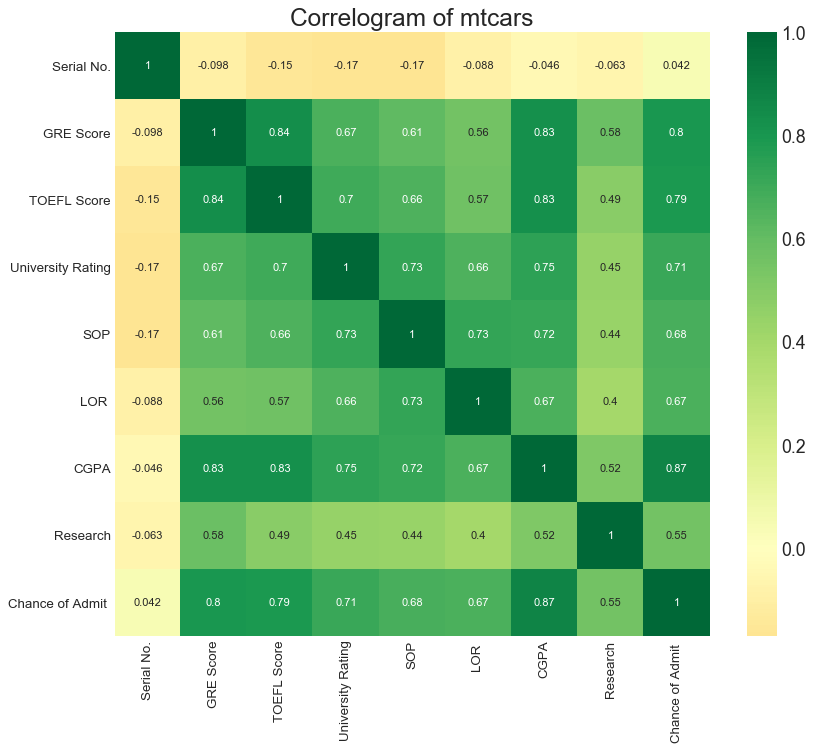

In [2]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline
# Import Dataset
df = pd.read_csv("dataset.csv")

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()